In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from lib import filter_zeros, make_pairplot, make_corr_plot, make_countplot, get_PCA_sets, make_feature_distribution_plots, get_resampled_data, get_best_k_param, get_nb_hyperparams, get_log_reg_hyperparams, get_svm_hyperparams, get_dec_tree_hyperparams, model_eval_stats

Read the dataset and add a binary feature representing whether data point has diabetes, based on blood glucose levels

In [214]:
diabetes = pd.read_csv('data/diabetes_custom_ds.csv')

thresh = 6.5
diabetes['target'] = diabetes['glyhb'].apply(lambda e: 1 if e >= 6.5 else 0)
diabetes.describe()

id        chol    stab.glu         hdl       ratio  \
count    403.000000  402.000000  403.000000  402.000000  402.000000   
mean   15978.310174  207.845771  106.672457   50.445274    4.521642   
std    11881.122124   44.445557   53.076655   17.262626    1.727886   
min     1000.000000   78.000000   48.000000   12.000000    1.500000   
25%     4792.500000  179.000000   81.000000   38.000000    3.200000   
50%    15766.000000  204.000000   89.000000   46.000000    4.200000   
75%    20336.000000  230.000000  106.000000   59.000000    5.400000   
max    41756.000000  443.000000  385.000000  120.000000   19.299999   

            glyhb         age      height      weight       bp.1s       bp.1d  \
count  390.000000  403.000000  398.000000  402.000000  398.000000  398.000000   
mean     5.589769   46.851117   66.020101  177.592040  136.904523   83.321608   
std      2.242595   16.312333    3.918515   40.340666   22.741033   13.589227   
min      2.680000   19.000000   52.000000   99.000000   90.000000   48.000000   
25%      4.380000   34.000000   63.000000  151.000000  121.250000   75.000000   
50%      4.840000   45.000000   66.000000  172.500000  136.000000   82.000000   
75%      5.600000   60.000000   69.000000  200.000000  146.750000   90.000000   
max     16.110001   92.000000   76.000000  325.000000  250.000000  124.000000   

            bp.2s       bp.2d       waist         hip     time.ppn      target  
count  141.000000  141.000000  401.000000  401.000000   400.000000  403.000000  
mean   152.382979   92.524823   37.900249   43.039900   341.250000    0.161290  
std     21.712952   11.555198    5.729313    5.656713   309.540953    0.368256  
min    110.000000   60.000000   26.000000   30.000000     5.000000    0.000000  
25%    138.000000   84.000000   33.000000   39.000000    90.000000    0.000000  
50%    149.000000   92.000000   37.000000   42.000000   240.000000    0.000000  
75%    161.000000  100.000000   41.000000   46.000000   517.500000    0.000000  
max    238.000000  124.000000   56.000000   64.000000  1560.000000    1.000000

Compare train test split and cross fold validation methods for parititioning input data

In [ ]:
X = diabetes.copy()
float_cols = X.select_dtypes(include=['float']).columns
str_cols = X.select_dtypes(exclude=['number']).columns
filter_zeros(X, float_cols)

scaler = StandardScaler()
X[float_cols] = scaler.fit_transform(X[float_cols])
print("Float columns:", float_cols)

# encode categorical/qualitative data
print("String columns:", str_cols)
new_quals = pd.get_dummies(X[str_cols])
X = pd.concat([X.drop(columns=str_cols), new_quals], axis=1)
y = diabetes['target']
print(X.columns[X.isnull().any()])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cols Index(['chol', 'hdl', 'ratio', 'glyhb', 'height', 'weight', 'bp.1s', 'bp.1d',
       'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn'],
      dtype='object')
Float columns: Index(['chol', 'hdl', 'ratio', 'glyhb', 'height', 'weight', 'bp.1s', 'bp.1d',
       'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn'],
      dtype='object')
String columns: Index(['location', 'gender', 'frame'], dtype='object')
Index([], dtype='object')


Principal Component Analysis to reduce feature dimensionality

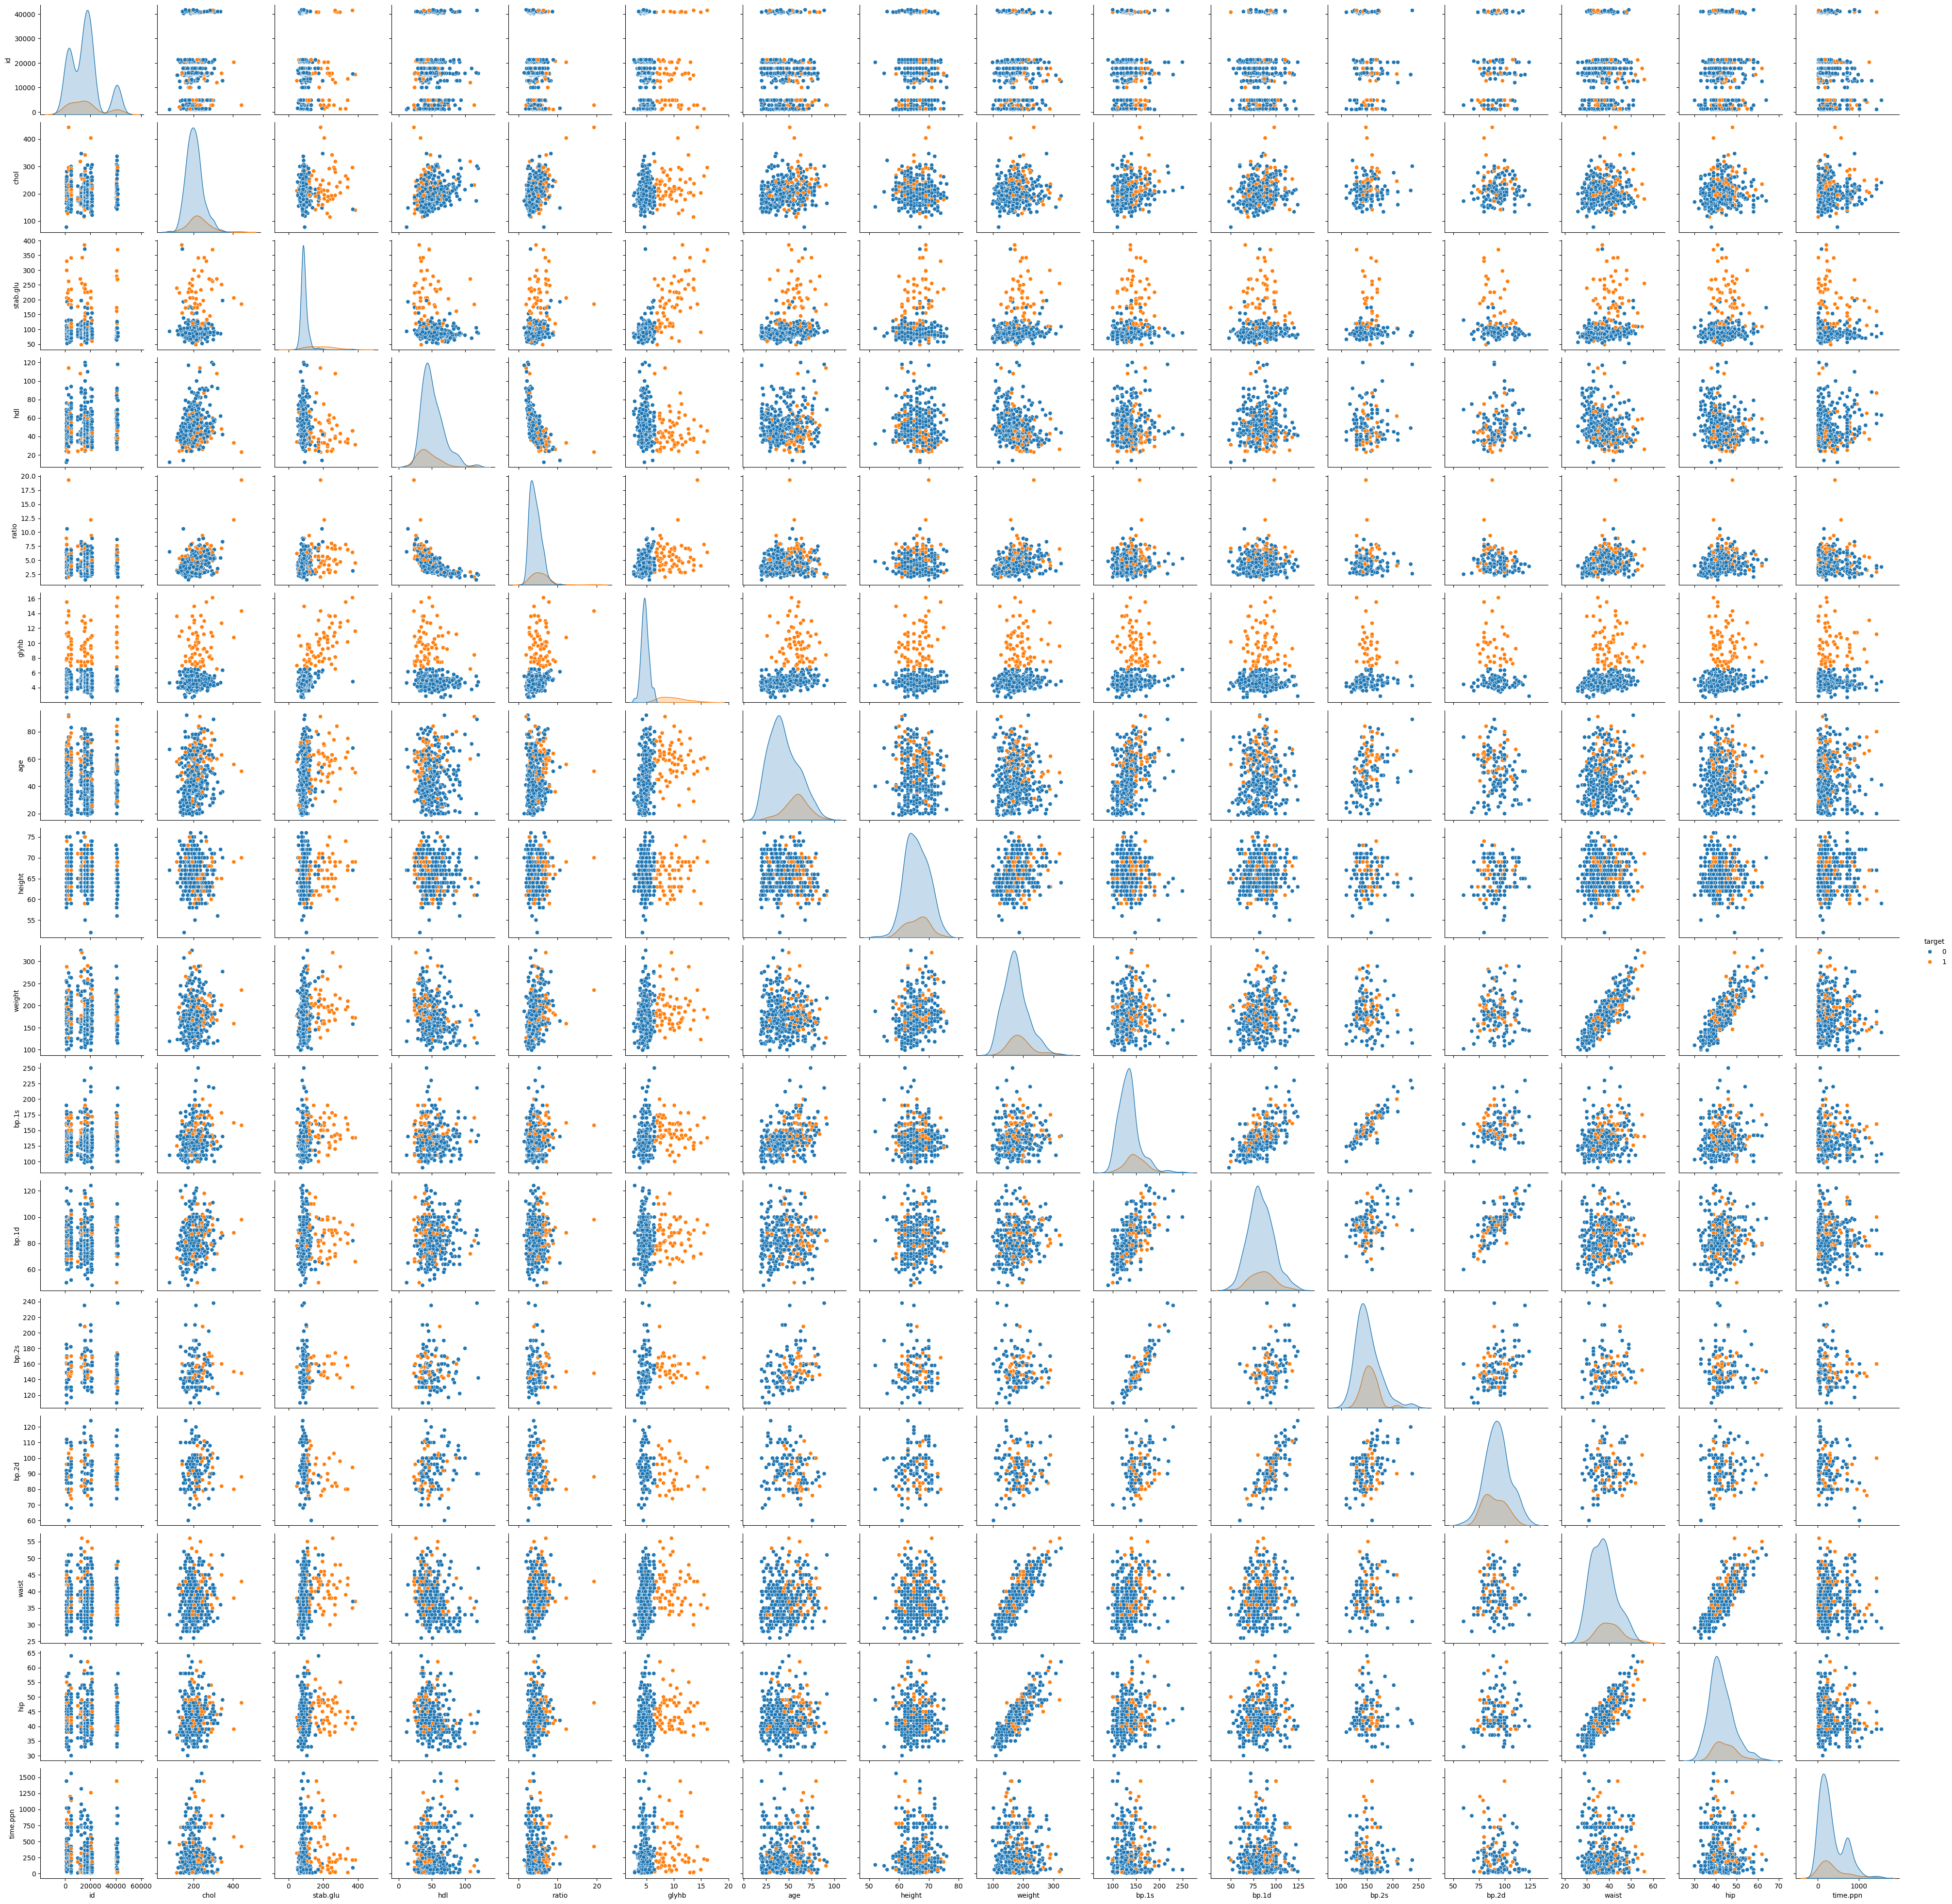

In [ ]:
make_pairplot(diabetes, 'target')

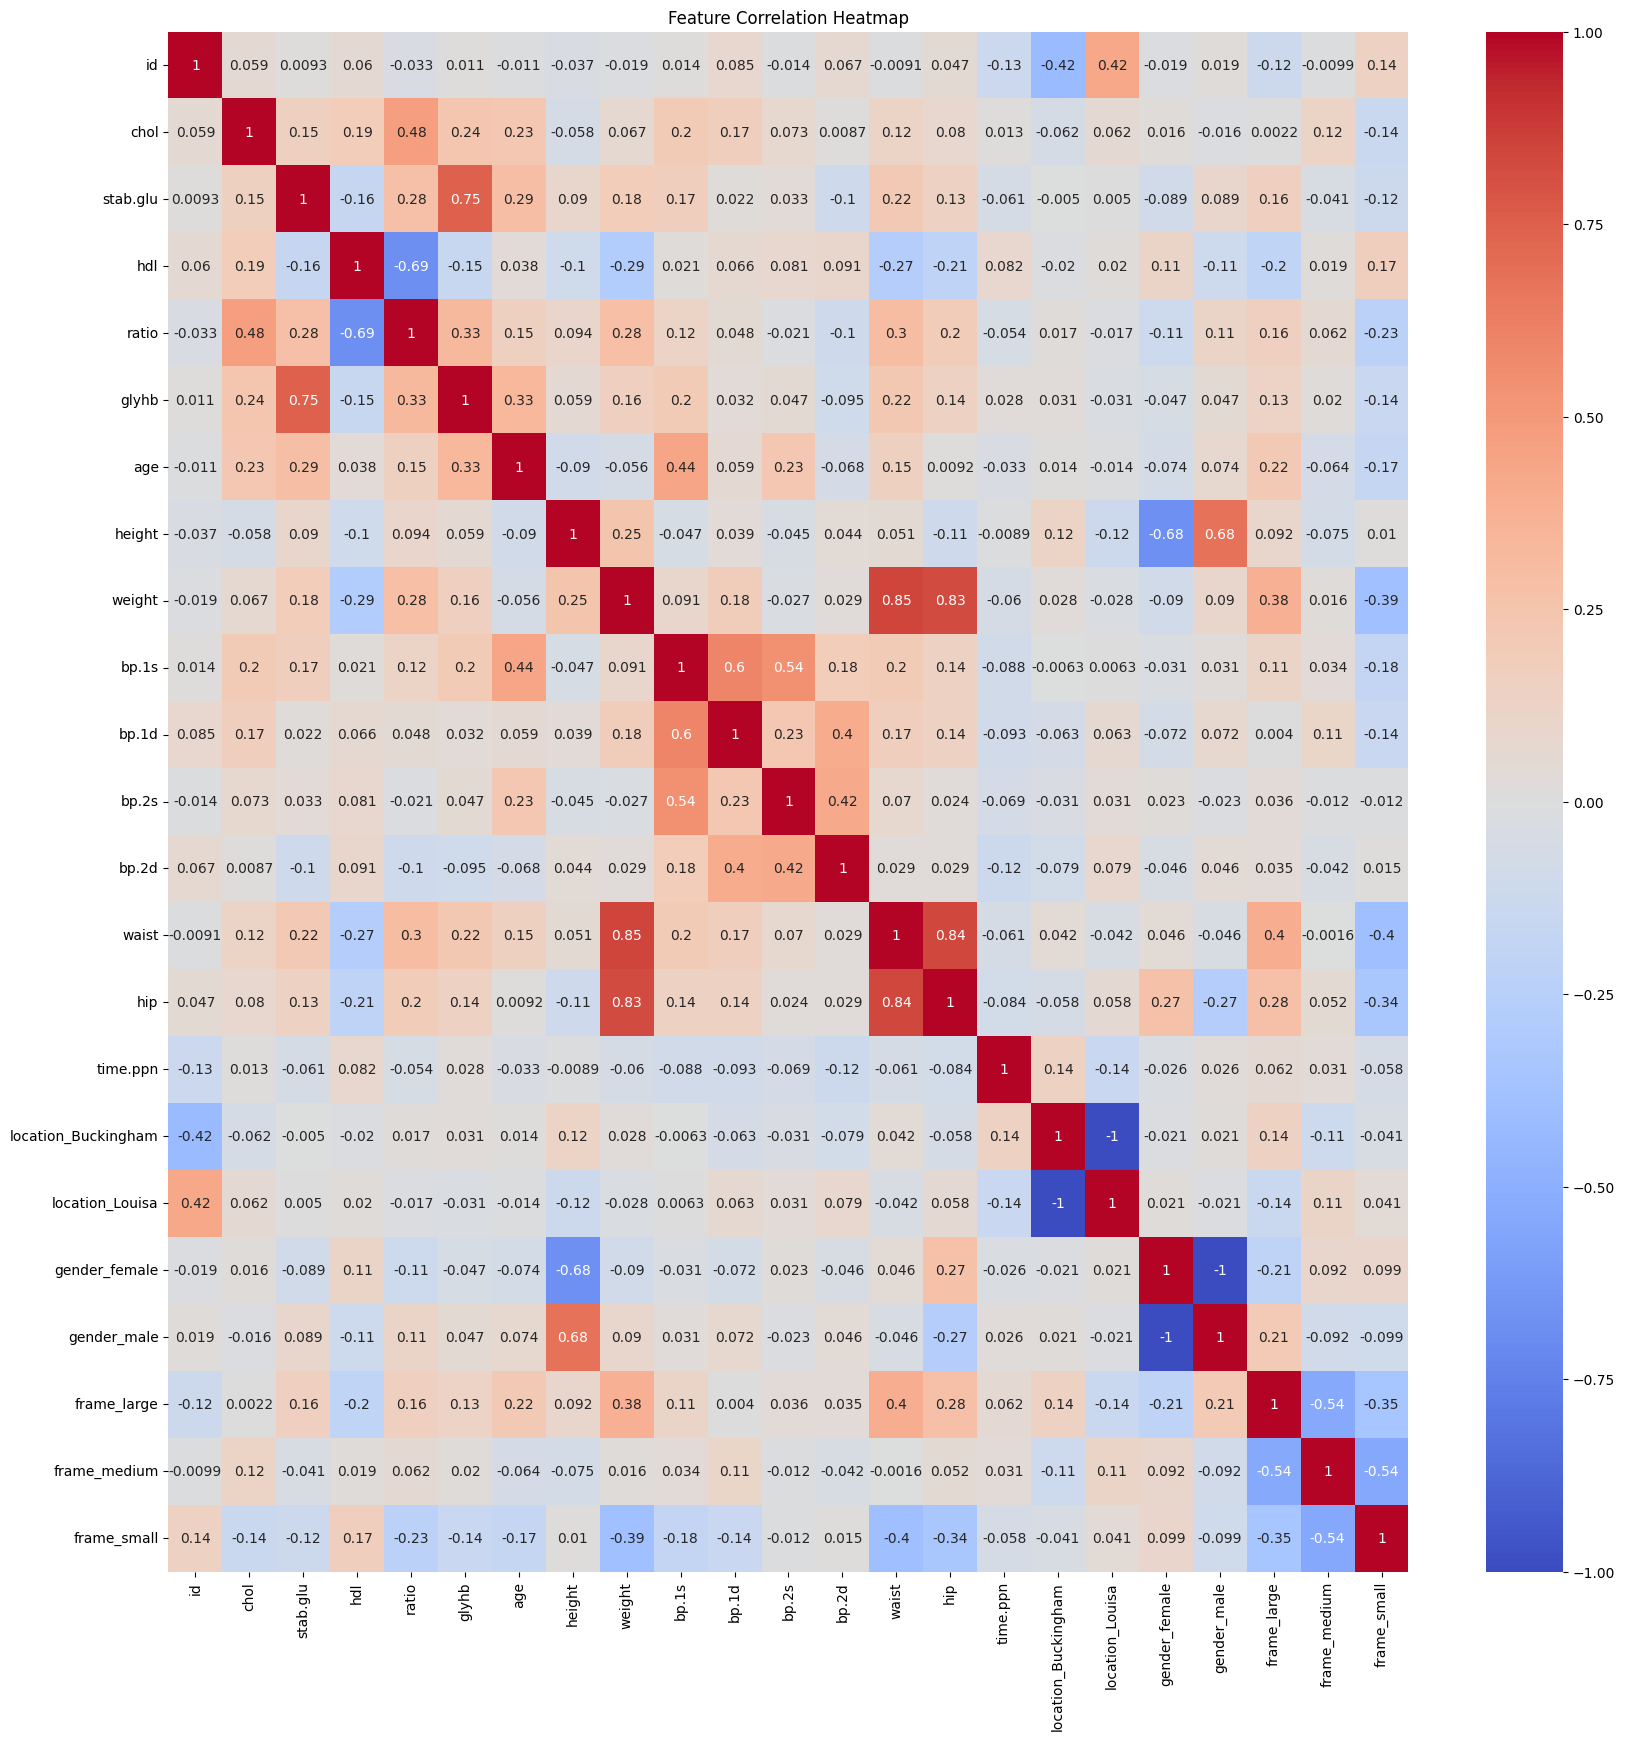

In [ ]:
make_corr_plot(X)

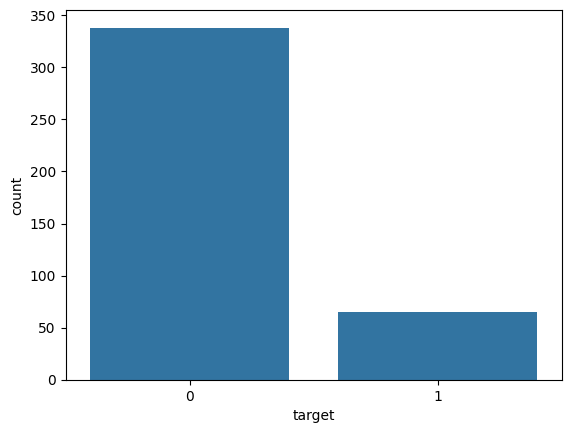

In [ ]:
make_countplot(X, key='target')

In [ ]:
X_train, X_test = get_PCA_sets(X_train, X_test)

[9.99980750e-01 1.67323100e-05 2.41572428e-06 2.19815590e-08
 1.56674064e-08]


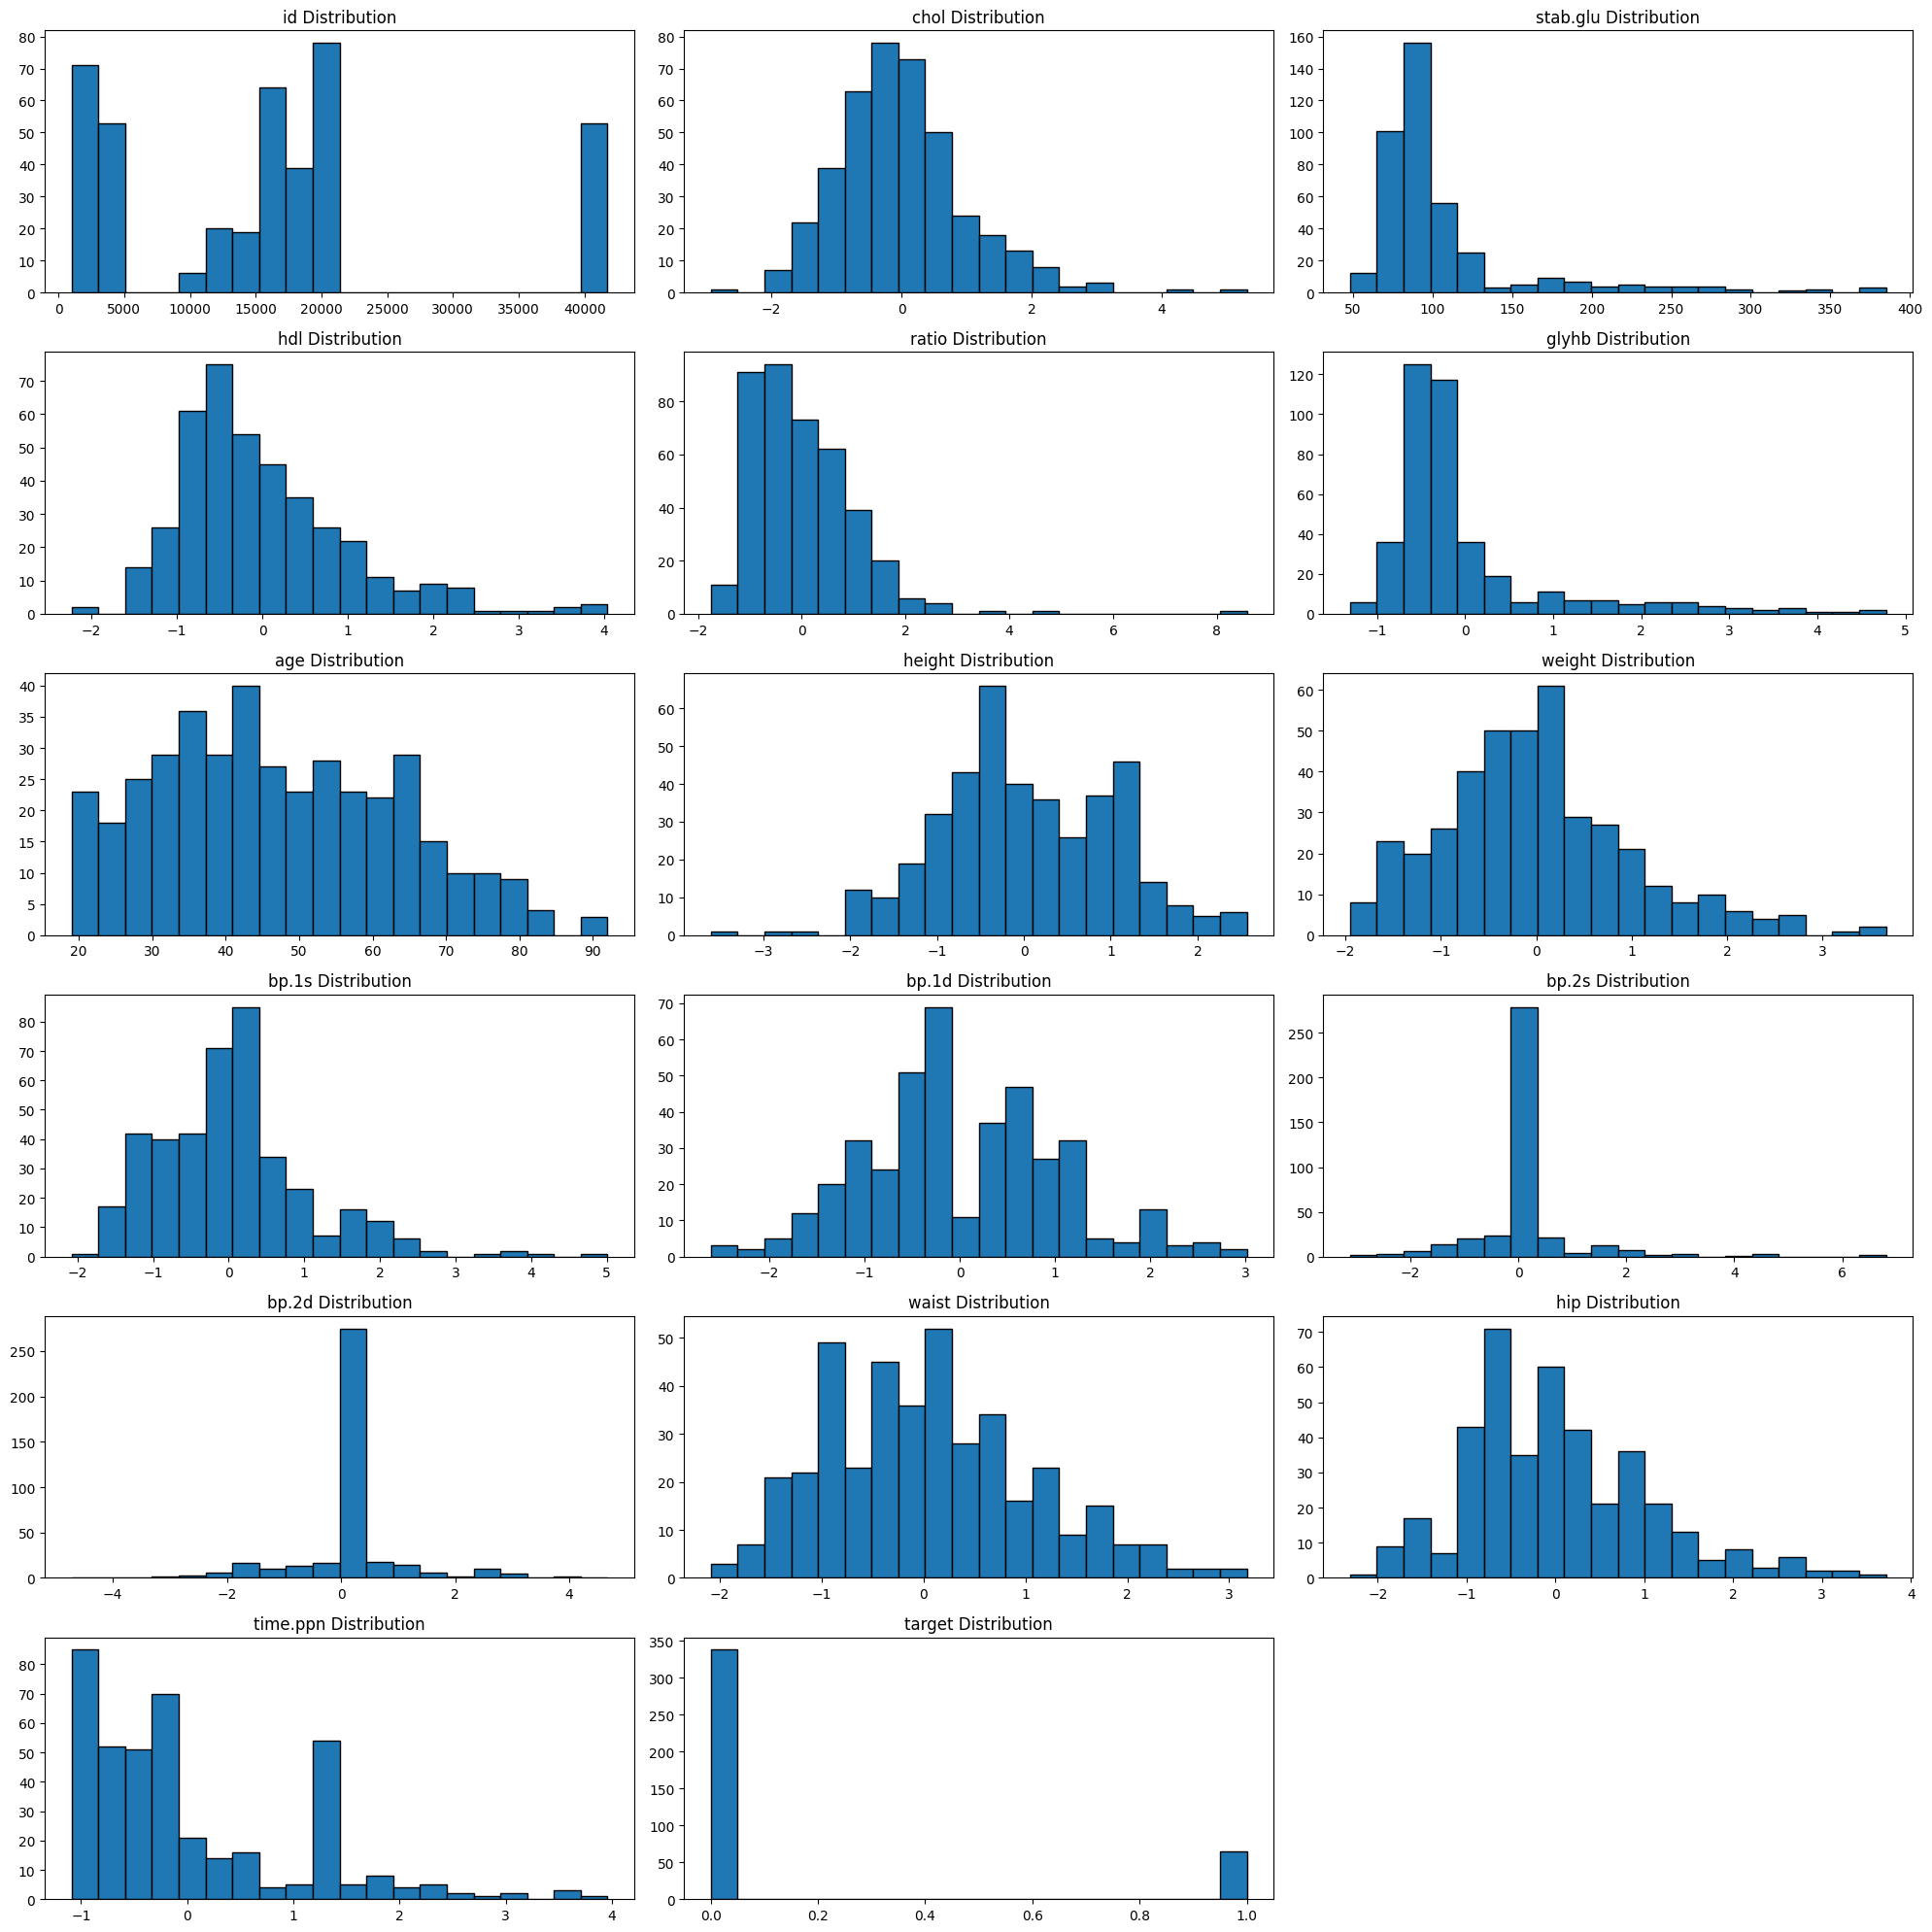

In [ ]:
make_feature_distribution_plots(X)

In [ ]:
# class balancing with SMOTE
X_train_resampled, y_train_resampled = get_resampled_data(X_train, X_test)

Hyperparameter tuning for models before training, either by looping through possible hyperparameters or automating the process using a tuning grid. The liblinear solver was used by default for the logistic regression so the regression reaches a stable solution and converges.

In [ ]:
get_best_k_param(X_train, y_train, X_test, y_test)

k is 1 with score 0.7283950617283951
k is 2 with score 0.8518518518518519
k is 3 with score 0.8518518518518519
k is 4 with score 0.8518518518518519
k is 5 with score 0.8518518518518519
k is 6 with score 0.8395061728395061
k is 7 with score 0.8395061728395061
k is 8 with score 0.8395061728395061
k is 9 with score 0.8395061728395061
k is 10 with score 0.8395061728395061
k is 11 with score 0.8395061728395061
k is 12 with score 0.8395061728395061
k is 13 with score 0.8395061728395061
k is 14 with score 0.8395061728395061
k is 15 with score 0.8395061728395061
k is 16 with score 0.8395061728395061
k is 17 with score 0.8395061728395061
k is 18 with score 0.8395061728395061
k is 19 with score 0.8395061728395061
k is 20 with score 0.8395061728395061
k is 21 with score 0.8395061728395061
k is 22 with score 0.8395061728395061
k is 23 with score 0.8395061728395061
k is 24 with score 0.8395061728395061
k is 25 with score 0.8395061728395061
k is 26 with score 0.8395061728395061
k is 27 with score 0.

In [ ]:
get_nb_hyperparams(X_train, y_train)

Best hyperparameters: {'var_smoothing': 1e-11}


In [ ]:
get_log_reg_hyperparams(X_train, y_train)

Best hyperparameters: {'C': 1, 'max_iter': 50, 'penalty': 'l1'}


In [ ]:
get_dec_tree_hyperparams(X_train, y_train)

Best hyperparameters: {'criterion': 'gini'}


In [ ]:
get_svm_hyperparams(X_train, y_train)

Best hyperparameters: {'kernel': 'poly'}


0.8518518518518519
f1 scores are [0.848 0.909 0.844 0.906 0.906 0.906 0.781 0.875 0.906 0.812]
0.9012345679012346
f1 scores are [0.879 0.939 0.875 0.969 1.    0.969 0.906 0.875 0.938 0.906]
0.9135802469135802
f1 scores are [0.879 0.939 0.875 0.969 1.    0.969 0.938 0.875 0.938 0.875]
0.9012345679012346
f1 scores are [0.818 0.909 0.844 0.875 0.969 0.938 0.938 0.906 0.781 0.875]
0.8395061728395061
f1 scores are [0.848 0.879 0.781 0.875 0.875 0.875 0.75  0.812 0.906 0.781]
Metrics for original data


kfold mean  kfold stddev  \
KNeighborsClassifier()                                   0.869         0.044   
GaussianNB()                                             0.926         0.042   
LogisticRegression(max_iter=1000, penalty='l1',...       0.926         0.044   
DecisionTreeClassifier(criterion='log_loss', ra...       0.885         0.056   
SVC(kernel='poly', random_state=42)                      0.838         0.050   

                                                    accuracy  precision  \
KNeighborsClassifier()                              0.851852   1.000000   
GaussianNB()                                        0.901235   0.857143   
LogisticRegression(max_iter=1000, penalty='l1',...  0.913580   1.000000   
DecisionTreeClassifier(criterion='log_loss', ra...  0.901235   0.727273   
SVC(kernel='poly', random_state=42)                 0.839506   0.000000   

                                                      recall  
KNeighborsClassifier()                              0.076923  
GaussianNB()                                        0.461538  
LogisticRegression(max_iter=1000, penalty='l1',...  0.461538  
DecisionTreeClassifier(criterion='log_loss', ra...  0.615385  
SVC(kernel='poly', random_state=42)                 0.000000

0.6419753086419753
f1 scores are [0.833 0.778 0.907 0.944 0.889 0.889 0.926 0.833 0.889 0.889]
0.8888888888888888
f1 scores are [0.852 0.926 0.87  0.944 0.87  0.87  0.926 0.852 0.889 0.852]
0.8271604938271605
f1 scores are [0.926 0.926 0.926 0.907 0.852 0.926 0.944 0.889 0.87  0.944]
0.8641975308641975
f1 scores are [0.907 0.926 0.907 0.907 0.889 0.963 0.87  0.926 0.87  0.963]
0.7407407407407407
f1 scores are [0.481 0.611 0.463 0.407 0.574 0.463 0.556 0.481 0.5   0.5  ]
Metrics for class balanced data


kfold mean  kfold stddev  \
KNeighborsClassifier()                                   0.878         0.047   
GaussianNB()                                             0.885         0.033   
LogisticRegression(max_iter=1000, penalty='l1',...       0.911         0.030   
DecisionTreeClassifier(criterion='log_loss', ra...       0.913         0.031   
SVC(kernel='poly', random_state=42)                      0.504         0.057   

                                                    accuracy  precision  \
KNeighborsClassifier()                              0.641975   0.192308   
GaussianNB()                                        0.888889   0.750000   
LogisticRegression(max_iter=1000, penalty='l1',...  0.827160   0.473684   
DecisionTreeClassifier(criterion='log_loss', ra...  0.864198   0.555556   
SVC(kernel='poly', random_state=42)                 0.740741   0.100000   

                                                      recall  
KNeighborsClassifier()                              0.384615  
GaussianNB()                                        0.461538  
LogisticRegression(max_iter=1000, penalty='l1',...  0.692308  
DecisionTreeClassifier(criterion='log_loss', ra...  0.769231  
SVC(kernel='poly', random_state=42)                 0.076923

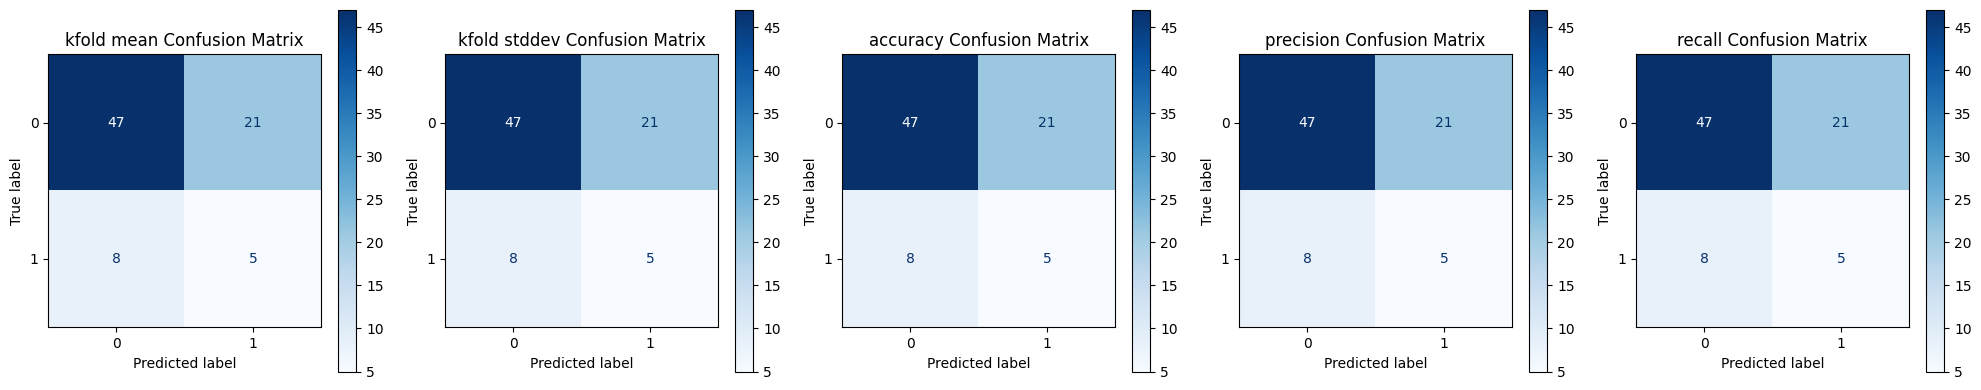

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB(var_smoothing=1e-11)
log_reg = LogisticRegression(max_iter=50, solver='liblinear', penalty='l1', random_state=42) # liblinear solver for convergence
dec_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
svm = SVC(kernel='poly', random_state=42) 

model_eval_stats(X_train, y_train, X_test, y_test, X_train_resampled, y_train_resampled, knn, nb, log_reg, dec_tree, svm)